# Manual feature extraction I

You want to compare prices for specific products between stores. 

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
sales_df = pd.read_csv("dataset/grocery_sales.csv")
sales_df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


In [5]:
# Instantiate the encoder
label_encoder = LabelEncoder()

# Fit and transform the "test" column
sales_df["storeID"] = label_encoder.fit_transform(sales_df["storeID"])
sales_df["product"] = label_encoder.fit_transform(sales_df["product"])
sales_df.head()


,storeID,product,quantity,revenue
0,0,0,1811,9300.6
1,0,1,1003,3375.2
2,0,2,1604,8528.5
3,1,0,1785,9181.0
4,1,1,944,3680.2


In [6]:
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df["revenue"]/sales_df["quantity"]

# Drop the quantity and revenue features
reduced_df = sales_df.drop(["revenue", "quantity"], axis=1)

print(reduced_df.head())

   storeID  product     price
0        0        0  5.135616
1        0        1  3.365105
2        0        2  5.317020
3        1        0  5.143417
4        1        1  3.898517


# Manual feature extraction II

You're working on a variant of the ANSUR dataset, `height_df`, where a person's height was measured 3 times: `height_1`, `height_2`, `height_3`. Add a feature with the mean height to the dataset, then drop the 3 original features.

In [7]:
# # Calculate the mean height
# height_df['height'] = height_df[["height_1", "height_2", "height_3"]].mean(axis=1)

# # Drop the 3 original height features
# reduced_df = height_df.drop(["height_1", "height_2", "height_3"], axis=1)

# print(reduced_df.head())

# Principal component intuition

After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors that are aligned with the main directions of variance. We can describe each point in the dataset as a combination of these two vectors multiplied with a value each. These values are then called principal components.

<center><img src="images/04.02.png"  style="width: 400px, height: 300px;"/></center>


- People with a negative component for the yellow vector have long forearms relative to their upper arms.

# Calculating Principal Components

You'll visually inspect a 4 feature sample of the dataset before and after PCA using Seaborn's `pairplot()`. This will allow you to inspect the pairwise correlations between the features.

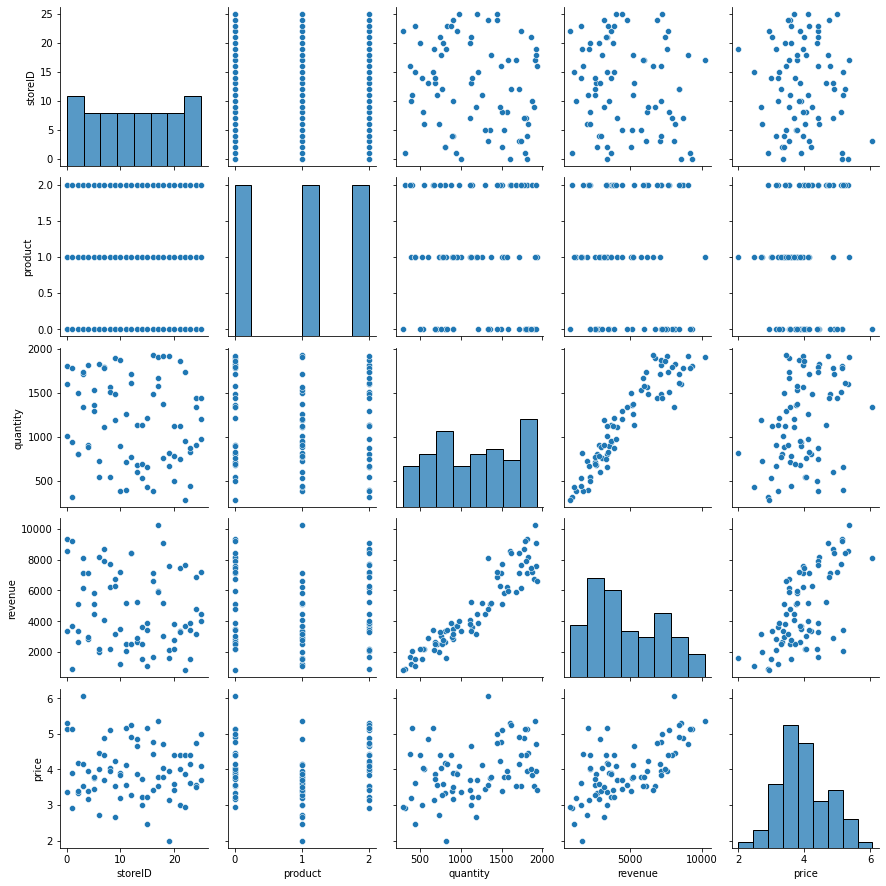

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a pairplot to inspect ansur_df
sns.pairplot(sales_df)

plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler and standardize the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(sales_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)



In [13]:
# This changes the numpy array output back to a DataFrame
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])
pc_df

,PC 1,PC 2,PC 3,PC 4,PC 5
0,2.955711,-1.375595,-0.819340,0.756537,0.154171
1,-0.645995,-0.488200,-1.769375,-0.148939,-0.030683
2,2.635087,1.042365,-1.440142,0.734970,0.142170
3,2.876326,-1.338042,-0.697843,0.780951,0.148529
4,-0.330869,-0.306541,-1.531542,0.441724,-0.046548
...,...,...,...,...,...
73,-1.247754,0.281824,1.287265,-0.315826,0.013175
74,1.138783,1.645881,1.417126,-0.029713,0.058003
75,1.341322,-0.585297,2.213485,0.669297,0.053278
76,-0.463824,0.295761,1.527552,-0.525113,-0.030849


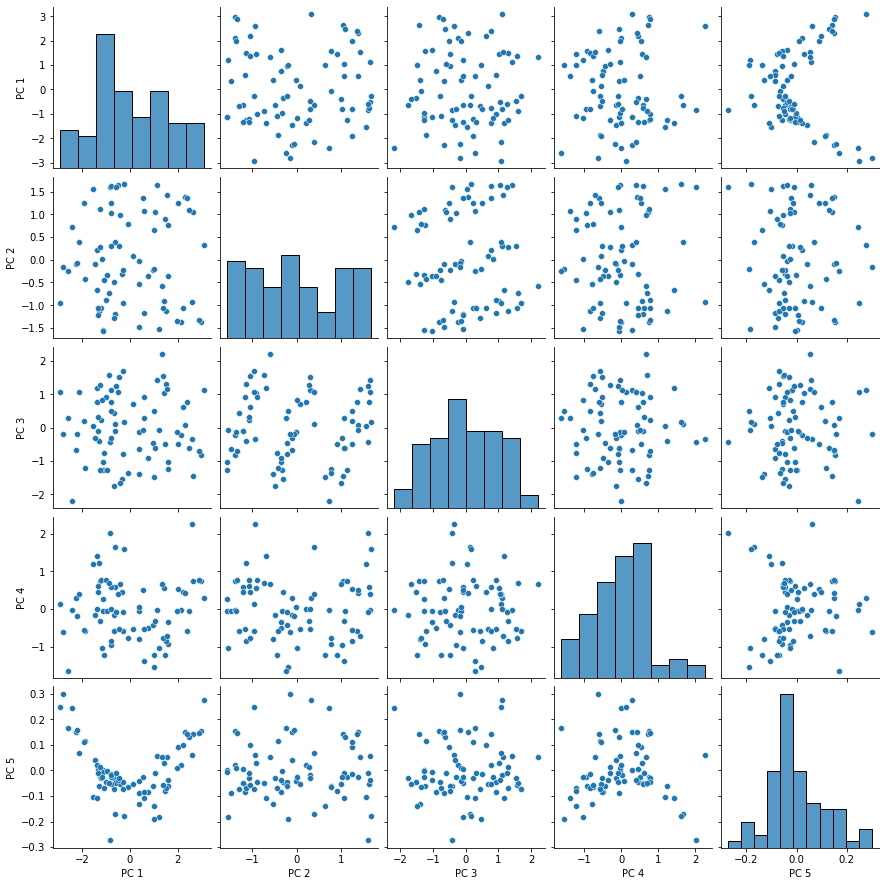

In [14]:
# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

# PCA on a larger dataset

You'll now apply PCA on a somewhat larger datasample.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(sales_df)

# Apply PCA
pca = PCA()
pca.fit_transform(ansur_std)

array([[ 2.95571092e+00, -1.37559491e+00, -8.19339690e-01,
         7.56537409e-01,  1.54171074e-01],
       [-6.45995018e-01, -4.88199866e-01, -1.76937527e+00,
        -1.48938989e-01, -3.06832746e-02],
       [ 2.63508691e+00,  1.04236531e+00, -1.44014156e+00,
         7.34970411e-01,  1.42170196e-01],
       [ 2.87632557e+00, -1.33804169e+00, -6.97843115e-01,
         7.80950906e-01,  1.48528850e-01],
       [-3.30868926e-01, -3.06541039e-01, -1.53154154e+00,
         4.41724300e-01, -4.65480632e-02],
       [-2.40901922e+00,  7.29720144e-01, -2.19635640e+00,
        -1.40475322e-02,  2.45924040e-01],
       [-1.13465201e+00, -1.55483413e+00, -1.26188614e+00,
         2.78144397e-01,  2.12986605e-03],
       [ 3.74227495e-01, -5.31470851e-01, -1.39861099e+00,
        -7.95616653e-01, -1.31703336e-01],
       [-4.00228497e-01,  9.92731253e-01, -1.67402814e+00,
         6.59315680e-01, -5.25558829e-02],
       [ 2.58123589e+00, -9.35268506e-01, -3.43698825e-01,
         2.26800347e+00

# PCA explained variance

You'll be inspecting the variance explained by the different principal components of the `pca` instance you created in the previous exercise.

In [16]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.47066085 0.20343409 0.19348069 0.1300432  0.00238116]


In [17]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.47066085 0.67409494 0.86757564 0.99761884 1.        ]


# Understanding the components

You'll apply PCA to the numeric features of the Pokemon dataset, `poke_df`, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

In [18]:
from sklearn.pipeline import Pipeline
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

In [32]:
poke_df = pd.read_csv("dataset/pokemon.csv")
poke_df.drop(['#','Name','Type 2'], axis=1, inplace=True)
print(poke_df.columns)
poke_df.head()
poke_df['Type 1'] = label_encoder.fit_transform(poke_df['Type 1'])
poke_df['Legendary'] = label_encoder.fit_transform(poke_df['Legendary'])

Index(['Type 1', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [33]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(poke_df)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(poke_df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(poke_df.columns, vectors[1]))))

PC 1 effects = {'Type 1': 0.01, 'Total': 0.49, 'HP': 0.31, 'Attack': 0.36, 'Defense': 0.29, 'Sp. Atk': 0.38, 'Sp. Def': 0.36, 'Speed': 0.28, 'Generation': 0.04, 'Legendary': 0.31}
PC 2 effects = {'Type 1': 0.6, 'Total': 0.02, 'HP': 0.16, 'Attack': -0.02, 'Defense': 0.49, 'Sp. Atk': -0.21, 'Sp. Def': 0.19, 'Speed': -0.48, 'Generation': -0.17, 'Legendary': -0.17}


# PCA for feature exploration

You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in `poke_df`.

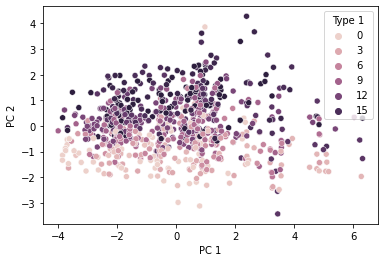

In [34]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_df['PC 1'] = pc[:, 0]
poke_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

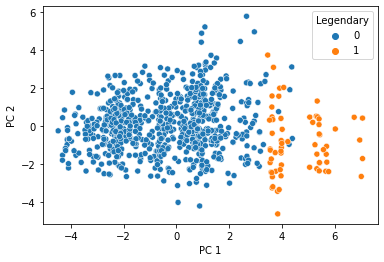

In [35]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

# Add the 2 components to poke_cat_df
poke_df['PC 1'] = pc[:, 0]
poke_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

# PCA in a model pipeline

We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = poke_df.drop("Legendary", axis=1)
y = poke_df["Legendary"]



# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')


[0.4293046  0.19654272 0.09600212]
95.0% test set accuracy


# Selecting the proportion of variance to keep

You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

In [43]:
# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(poke_df)

print(f'{len(pipe["reducer"].components_)} components selected')

5 components selected


# Choosing the number of components

You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique.

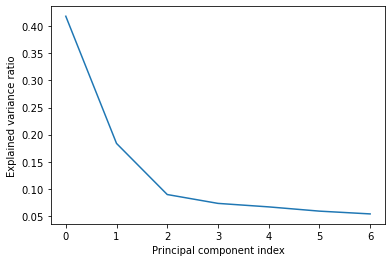

In [45]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=7))])

# Fit the pipe to the data
pipe.fit(poke_df)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

# PCA for image compression

You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array `X_test`. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in `X_test`

In [48]:
# # Transform the input data to principal components
# pc = pipe.transform(X_test)

# # Inverse transform the components to original feature space
# X_rebuilt = pipe.inverse_transform(pc)

# # Plot the reconstructed data
# plot_digits(X_rebuilt)